### Create bubble plot of music library genres

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import os
from tinytag import TinyTag
import seaborn as sns
import matplotlib.pyplot as plt
import circlify

df0 = pd.DataFrame()

In [7]:
# Create empty lists to store results
song_list = []
album_list = []
artist_list = []
genre_list = []
year_list = []

seperator = '\\'

for root, dirs, files in os.walk(r'C:\Users\User\Dropbox\00-MUSIC'):

    # select file name
    for file in files:
        # only get music files
        if file.endswith('.mp3' or '.aiff' or '.flac' or '.aac' or '.wav' or '.mp4' or '.m4a'): 
            
            # get genre
            tag: TinyTag = TinyTag.get(os.path.join(root, file))
            
            song_list.append(tag.title)
            artist_list.append(tag.artist)
            album_list.append(tag.album)
            genre_list.append(tag.genre)
            
df0['Song'] = song_list     
df0['Album'] = album_list     
df0['Artist'] = artist_list  
df0['Genre'] = genre_list  

In [8]:
# If music genre is 'none' or 'other' try to get from file analysis
# drop in the meantime

df01 = df0.dropna(subset=['Genre'])

In [9]:
genre_list = df01['Genre'].unique()
artist_list = df01['Artist'].unique()

print(genre_list)
genre_num = len(genre_list)

['Blues' 'Other' 'Alternative Metal' 'Instrumental' 'Folk/Rock' 'Trip-Hop'
 'Soundtrack' 'Ambient' 'oldies' 'Pop' 'Gospel' 'Ballad' 'Classical'
 'Electronica' 'Psychedelic Rock' 'Alternative & Punk' 'General Hip Hop'
 'Rap' 'Rock' 'Classic Rock' 'rock' 'Electro Ambient' 'Electronic'
 'Techno' 'Dance' 'Punk' 'Rock/Pop' 'DSP; Electronica' 'Folk-Rock'
 'General Reggae' 'Electronica/Dance' 'Indie' 'Spoken & Audio'
 'xperimental' 'Alternative' 'genre' 'Soft Rock' 'Oldies'
 'General Electronic' 'Club' 'Gothic' 'Brit Pop' 'AlternRock' "Children's"
 'Metal' 'Retro' 'Unknown' 'Rap/R&B' 'From 60s to 80s; Oldies' 'Punk Rock'
 'New Wave' 'New Age' 'Synthpop' 'European Pop' 'Hip-Hop' 'Rave, Hip Hop'
 'Hardcore Rap' 'Free Sample' 'Top 40' 'Gothic Rock' 'electronica'
 'From 60s to 80s; misc' 'Industrial' 'Pop/Funk' 'Underground Rap'
 'General Pop' 'Country' 'Popular' 'Hip-Hop/Rap' 'Chamber Music' 'Chilled'
 'R&B' 'House' 'Dance & House' 'Film Soundtrack' 'Rock & Roll' 'Funk'
 'misc' 'Hard Rock' 'Folk

In [10]:
# create list of colours 
# Get a default palette with a specified number of colors
#palette = sns.color_palette(None, genre_num).as_hex()
#print(palette)

# Choose a specific named palette
colour_list = sns.color_palette("viridis", genre_num).as_hex()

In [32]:
size_list = []
for e in genre_list:
    size_list.append(df01['Genre'].value_counts().get(e, 0))

In [33]:
keys = ['Genre', 'Colours', 'Size']
values = [genre_list, colour_list, size_list]
circ_dict = dict(zip(keys, values))

In [35]:
# compute circle positions
circles = circlify.circlify(
    size_list,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# reverse the order of the circles to match the order of data
circles = circles[::-1]

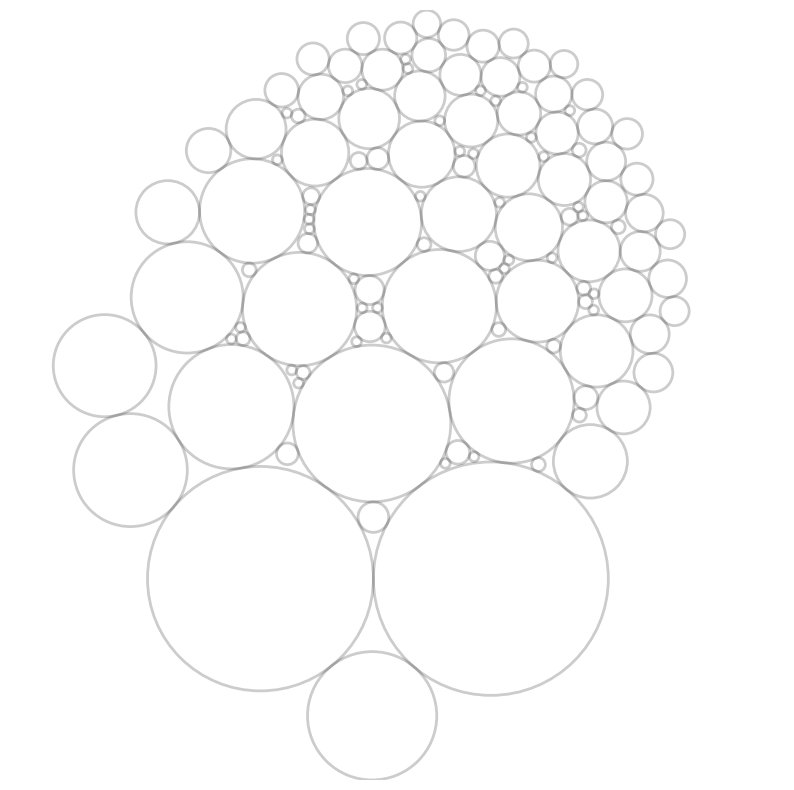

In [36]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2, fill=False))


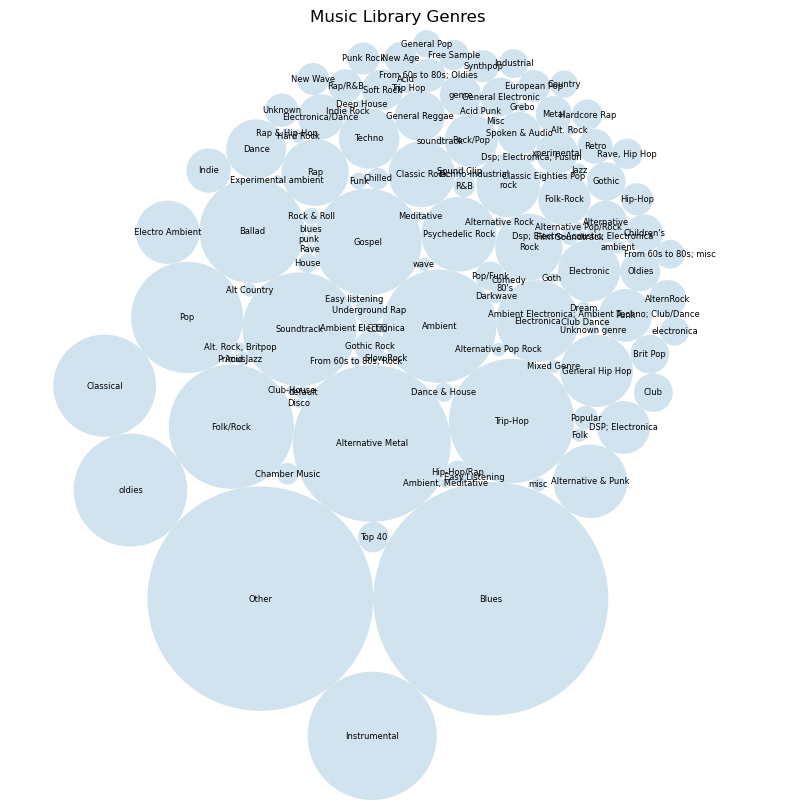

In [39]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('Music Library Genres')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = genre_list

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2))
    plt.annotate(
        label,
        (x, y),
        fontsize = 6,
        va='center',
        ha='center'
    )

In [ ]:
# next steps 
# - scale and prevent overlapping title test
# - Clean up genre categories to group smaller bubbles with larger ones (i.e. 'Folk/Rock' and 'Folk')